## Diamonds Price Prediction

#### Objectives:
- Loading the data.
- Data Exploration.
- Preprocessing for data.
- Dealing with outliers.
- Label Encoder.
- Prediction Models.

|Column |Meaning   |
|-------|-----------|
|carat  |The weight of the diamond   |
|cut    |style or design guide used when shaping a diamond for polishing   |
|color  |Diamonds vary from colourless to black, and they may be transparent, translucent, or opaque.  |
|clarity|the quality of diamonds that relates to the existence and visual appearance of internal characteristics of a diamond called inclusions, and surface defects, called blemishes.|
|depth  |The depth of a diamond might also be called the “height”: it is the distance from the table to the culet (the pointed tip) of the diamond. |
|price  |The price of the diamond   |
|x      |The width of the diamond   |
|y      |The height of the diamond   |
|z      |The depth of the diamond   |

## Import Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

## Explore Data:

In [2]:
df_train = pd.read_csv('train.csv')
df_train.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


1. Numerical Columns: carat, depth, price, x, y and z.
2. Categorical Columns: cut, color and clarity.

In [3]:
df_train.set_index('Id', inplace=True)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43152 entries, 1 to 43152
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43152 non-null  float64
 1   cut      43152 non-null  object 
 2   color    43152 non-null  object 
 3   clarity  43152 non-null  object 
 4   depth    43152 non-null  float64
 5   table    43152 non-null  float64
 6   price    43152 non-null  int64  
 7   x        43152 non-null  float64
 8   y        43152 non-null  float64
 9   z        43152 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.6+ MB


In [5]:
df_train['cut'].value_counts()

Ideal        17203
Premium      11113
Very Good     9658
Good          3881
Fair          1297
Name: cut, dtype: int64

In [6]:
df_train['cut'].nunique()

5

In [7]:
df_train['color'].value_counts()

G    9060
E    7832
F    7633
H    6651
D    5421
I    4265
J    2290
Name: color, dtype: int64

- G (worst) to D (best)

In [8]:
df_train['color'].nunique()

7

In [9]:
df_train['clarity'].value_counts()

SI1     10428
VS2      9824
SI2      7432
VS1      6475
VVS2     4041
VVS1     2904
IF       1442
I1        606
Name: clarity, dtype: int64

In [10]:
df_train['clarity'].nunique()

8

- I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)

In [19]:
df_train.describe()

,carat,depth,table,price,x,y,z
count,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000,43135.000000
mean,0.797578,61.747386,57.457925,3927.668691,5.731757,5.735070,3.539962
std,0.473325,1.435091,2.233401,3983.324154,1.119336,1.147272,0.704884
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,947.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2400.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5311.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


- x, y and z have zero values and this isn't correct so I will drop rows contain this value.

In [20]:
#Dropping dimentionless diamonds
df_train = df_train.drop(df_train[df_train["x"]==0].index)
df_train = df_train.drop(df_train[df_train["y"]==0].index)
df_train = df_train.drop(df_train[df_train["z"]==0].index)
df_train.shape
# removing 17 row

(43135, 10)

### Missing and Duplication:

In [21]:
df_train.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [22]:
df_train.duplicated().sum()

97

In [23]:
df_train.drop_duplicates()

,carat,cut,color,clarity,depth,table,price,x,y,z
Id,,,,,,,,,,
1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50
...,...,...,...,...,...,...,...,...,...,...
43148,0.52,Ideal,E,VS2,61.5,56.0,1760,5.16,5.18,3.18
43149,0.72,Very Good,D,VS2,62.1,59.0,3016,5.70,5.73,3.55
43150,0.44,Premium,I,VVS1,61.5,58.0,990,4.95,4.87,3.02


In [24]:
df_train.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.023989,0.182861,0.921872,0.977923,0.948733,0.957294
depth,0.023989,1.000000,-0.302684,-0.013225,-0.029508,-0.033253,0.090595
table,0.182861,-0.302684,1.000000,0.128571,0.198068,0.185019,0.152507
price,0.921872,-0.013225,0.128571,1.000000,0.887172,0.862936,0.864861
x,0.977923,-0.029508,0.198068,0.887172,1.000000,0.969251,0.971492
y,0.948733,-0.033253,0.185019,0.862936,0.969251,1.000000,0.948567
z,0.957294,0.090595,0.152507,0.864861,0.971492,0.948567,1.000000


- The correlation price and carat is a strong positive.
- The correlation price and x is a strong positive.
- The correlation price and y is a strong positive.
- The correlation price and z is a strong positive.

## Dealing with outliers:
- Numerical Columns

- carat column

<AxesSubplot:xlabel='carat', ylabel='price'>

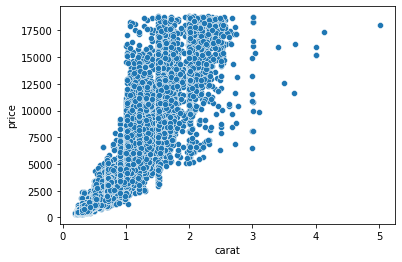

In [25]:
sns.scatterplot(x=df_train["carat"], y = df_train["price"])

- From graph there are some outliers > 3 so I will check them. If They aren't normal, I will delete them.

In [26]:
df_train[df_train["carat"] > 3]

,carat,cut,color,clarity,depth,table,price,x,y,z
Id,,,,,,,,,,
1302,3.04,Very Good,I,SI2,63.2,59.0,15354,9.14,9.07,5.75
3453,3.01,Fair,I,SI2,65.8,56.0,18242,8.99,8.94,5.90
5632,3.01,Premium,I,SI2,60.2,59.0,18242,9.36,9.31,5.62
7390,4.00,Very Good,I,I1,63.3,58.0,15984,10.01,9.94,6.31
8690,3.01,Fair,H,I1,56.1,62.0,10761,9.54,9.38,5.31
12567,3.50,Ideal,H,I1,62.8,57.0,12587,9.65,9.59,6.03
16303,3.65,Fair,H,I1,67.1,53.0,11668,9.53,9.48,6.38
18841,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
20985,3.11,Fair,J,I1,65.9,57.0,9823,9.15,9.02,5.98


In [27]:
df_train[df_train["carat"] > 3].shape

(21, 10)

- x column

<AxesSubplot:xlabel='x', ylabel='price'>

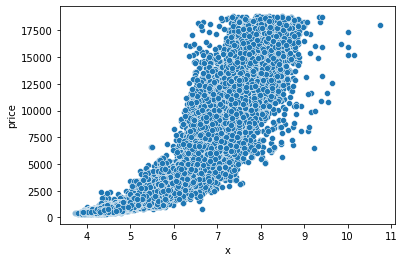

In [28]:
sns.scatterplot(x=df_train["x"], y = df_train["price"])

In [29]:
df_train[df_train["x"] < 2 ]

,carat,cut,color,clarity,depth,table,price,x,y,z
Id,,,,,,,,,,


In [30]:
df_train[df_train["x"] < 2 ].shape

(0, 10)

- y column

<AxesSubplot:xlabel='y', ylabel='price'>

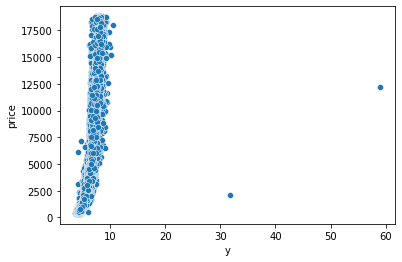

In [31]:
sns.scatterplot(x=df_train["y"], y = df_train["price"])

In [32]:
df_train[df_train["y"] > 30 ]

,carat,cut,color,clarity,depth,table,price,x,y,z
Id,,,,,,,,,,
35360,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.9,8.06
40664,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.8,5.12


In [33]:
df_train[df_train["y"] > 30 ].shape

(2, 10)

- z column

<AxesSubplot:xlabel='z', ylabel='price'>

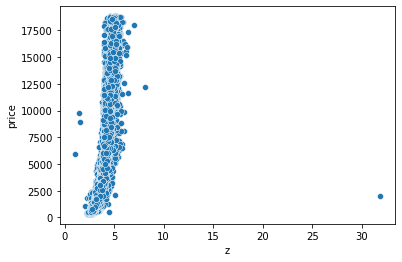

In [34]:
sns.scatterplot(x=df_train["z"], y = df_train["price"])

In [35]:
df_train[df_train["z"] > 30 ]

,carat,cut,color,clarity,depth,table,price,x,y,z
Id,,,,,,,,,,
10542,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.8


In [36]:
df_train[df_train["z"] > 30 ].shape

(1, 10)

- depth column

<AxesSubplot:xlabel='depth', ylabel='price'>

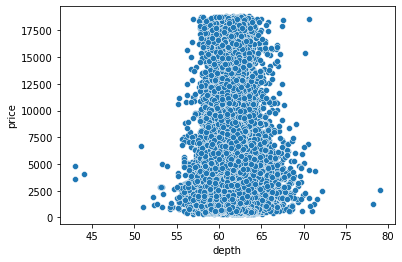

In [37]:
sns.scatterplot(x= df_train["depth"] , y=df_train["price"])

In [38]:
df_train[(df_train["depth"] > 75) | (df_train["depth"] < 45 )]

,carat,cut,color,clarity,depth,table,price,x,y,z
Id,,,,,,,,,,
3477,1.09,Ideal,J,VS2,43.0,54.0,4778,6.53,6.55,4.12
27568,1.03,Fair,E,I1,78.2,54.0,1262,5.72,5.59,4.42
29943,1.00,Fair,G,SI1,43.0,59.0,3634,6.32,6.27,3.97
39394,1.00,Fair,G,VS2,44.0,53.0,4032,6.31,6.24,4.12
40896,0.50,Fair,E,VS2,79.0,73.0,2579,5.21,5.18,4.09


In [39]:
df_train[(df_train["depth"] > 75) | (df_train["depth"] < 45 )].shape

(5, 10)

- table column

<AxesSubplot:xlabel='table', ylabel='price'>

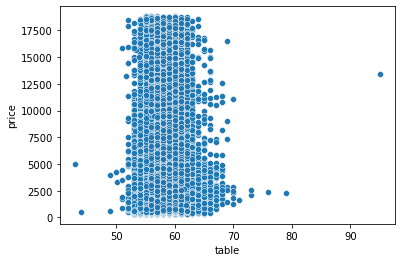

In [40]:
sns.scatterplot(x= df_train["table"] , y=df_train["price"])

In [41]:
df_train[df_train["table"] > 90]

,carat,cut,color,clarity,depth,table,price,x,y,z
Id,,,,,,,,,,
32830,2.01,Fair,F,SI1,58.6,95.0,13387,8.32,8.31,4.87


In [42]:
df_train[df_train["table"] > 90].shape

(1, 10)

- Based on Domain knowledge, We will **Remove Outliers**

In [43]:
#Identifying the outliers indexes
carat_index = list(df_train[df_train["carat"] >= 3].index)
x_index = list(df_train[df_train["x"] < 2 ].index)
y_index = list(df_train[df_train["y"] > 30 ].index)
z_index = list(df_train[df_train["z"] > 30 ].index)
depth_index = list(df_train[(df_train["depth"] > 75) | (df_train["depth"] < 45 )].index)
table_index = list(df_train[df_train["table"] > 90].index)

indexes = carat_index + x_index + y_index + z_index + depth_index + table_index
len(indexes)

36

In [44]:
#Delete the outliers
print("DF before delete  ", df_train.shape)
for outlier in indexes:
    df_train.drop(outlier, inplace=True)
print("DF after deleting  ",df_train.shape)

DF before delete   (43135, 10)
DF after deleting   (43099, 10)


## Dealing with categorical columns:

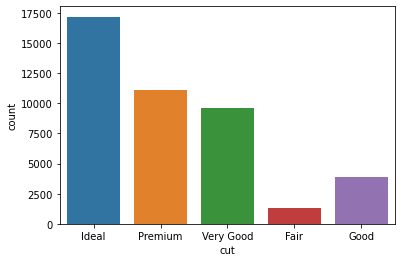

In [45]:
sns.countplot(df_train['cut'])
plt.show()

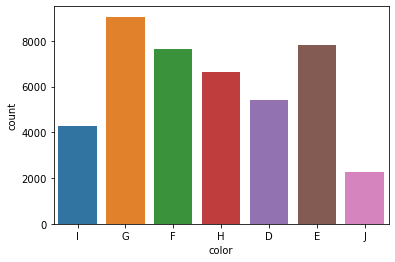

In [46]:
sns.countplot(df_train['color'])
plt.show()

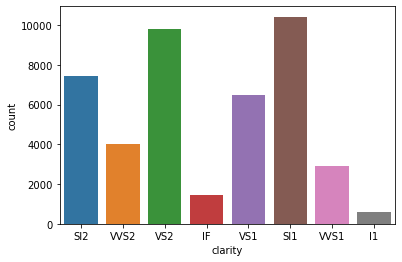

In [47]:
sns.countplot(df_train['clarity'])
plt.show()

## Label Encoder:

In [48]:
le = LabelEncoder()

In [49]:
df_train['cut'] = le.fit_transform(df_train['cut'])
df_train['color'] = le.fit_transform(df_train['color'])
df_train['clarity'] = le.fit_transform(df_train['clarity'])

In [50]:
df_train.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
Id,,,,,,,,,,
1,1.06,2,5,3,61.8,57.0,4270,6.57,6.60,4.07
2,1.51,3,3,7,60.9,58.0,15164,7.38,7.42,4.51
3,0.32,2,2,5,61.3,56.0,828,4.43,4.41,2.71
4,0.53,2,3,5,61.2,56.0,1577,5.19,5.22,3.19
5,0.70,3,4,7,61.0,57.0,2596,5.76,5.72,3.50


## Model:

In [51]:
X = df_train.drop('price', axis=1)
y = df_train['price']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [53]:
pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_svr=Pipeline([("scalar2",StandardScaler()),
                     ("svr_classifier",SVR())])

pipeline_dt=Pipeline([("scalar3",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])

pipeline_gbr=Pipeline([("scalar5",StandardScaler()),
                     ("gbr_classifier",GradientBoostingRegressor())])

pipeline_xgb=Pipeline([("scalar6",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_svr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_gbr, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "SVR", 2: "DecisionTree",3: "RandomForest", 4: "KNR",
             5: "GradientBoostingRegressor", 6:"XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [54]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -1298.787460 
SVR: -2966.626586 
DecisionTree: -742.154442 
RandomForest: -550.648773 
KNR: -834.113469 
GradientBoostingRegressor: -660.712377 
XGBRegressor: -543.602246 


In [55]:
# Model prediction on test data
pred = pipeline_xgb.predict(X_test)

In [56]:
# Model Evaluation
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.9794952539991685
Adjusted R^2: 0.9794738204667635
MAE: 280.4480496364514
MSE: 321554.32784772565
RMSE: 567.0576054050644


## Test Data:

In [57]:
test = pd.read_csv('test.csv')
test.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


In [58]:
test['cut'] = le.fit_transform(test['cut'])
test['color'] = le.fit_transform(test['color'])
test['clarity'] = le.fit_transform(test['clarity'])

In [59]:
test.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,2,3,7,61.1,57.0,4.52,4.48,2.75
1,2,0.71,3,1,5,62.7,58.0,5.74,5.68,3.58
2,3,0.44,4,5,4,62.8,56.0,4.83,4.88,3.05
3,4,0.81,3,1,3,60.1,59.0,6.09,6.03,3.65
4,5,0.40,2,3,6,61.2,56.0,4.74,4.80,2.92


In [60]:
Id = test['Id']
Id

0            1
1            2
2            3
3            4
4            5
         ...  
10783    10784
10784    10785
10785    10786
10786    10787
10787    10788
Name: Id, Length: 10788, dtype: int64

In [61]:
test.set_index('Id', inplace=True)

In [62]:
y_pred = pipeline_xgb.predict(test)

In [63]:
y_pred

array([  865.3263,  2824.9268,   848.3378, ...,  4220.031 ,  4857.8374,
       13801.561 ], dtype=float32)

In [64]:
test.shape

(10788, 9)

In [65]:
y_pred.shape

(10788,)

In [66]:
test['price'] = y_pred

In [67]:
test.sample()

,carat,cut,color,clarity,depth,table,x,y,z,price
Id,,,,,,,,,,
6122,1.01,3,5,3,59.6,62.0,6.56,6.5,3.89,3593.879883


In [68]:
data = {'Id': Id, 'price':y_pred}
sub = pd.DataFrame(data=data)
sub

,Id,price
0,1,865.326294
1,2,2824.926758
2,3,848.337830
3,4,3034.418701
4,5,1161.030151
...,...,...
10783,10784,1624.013550
10784,10785,6771.005859
10785,10786,4220.030762
10786,10787,4857.837402


In [69]:
sub.to_csv('submision.csv', index=False)